# Visualize each DVR basis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from discvar import Exponential, HarmonicOscillator, Sine

plt.style.use("seaborn-v0_8-dark")
plt.rcParams.update(
    {
        "image.cmap": "jet",
    }
)

## 1. Harmonic Oscillator DVR

- Unitary transformation of the eigenfunctions of HO.

In [2]:
HarmonicOscillator?

Init signature:
HarmonicOscillator(
    ngrid: 'int',
    omega: 'float',
    q_eq: 'float' = 0.0,
    units: 'str' = 'cm-1',
    dimnsionless: 'bool' = False,
    doAnalytical: 'bool' = True,
)
Docstring:     
Harmonic Oscillator DVR functions

See also  MCTDH review Phys.Rep. 324, 1 (2000) appendix B
https://doi.org/10.1016/S0370-1573(99)00047-2

Normalization factor :

.. math::
   A_n =
   \frac{1}{\sqrt{n! 2^n}}
   \left(\frac{m\omega}{\pi\hbar}\right)^{\frac{1}{4}}\
   \xrightarrow[\rm impl]{} \frac{1}{\sqrt{n! 2^n}}
   \left(\frac{\omega_i}{\pi}\right)^{\frac{1}{4}}


Dimensionless coordinate :

.. math::
   \zeta =
   \sqrt{\frac{m\omega} {\hbar}}(x-a)
   \xrightarrow[\rm impl]{} \sqrt{\omega_i}q_i

Primitive Function :

.. math::
   \varphi_n =
   A_n H_n(\zeta)
   \exp\left(- \frac{\zeta^2}{2}\right)\quad (n=0,2,\ldots,N-1)

Attributes:
    ngrid (int) : # of grid
    nprim (int) : # of primitive function. same as ``ngrid``
    omega (float) : frequency in a.u.
    q_eq (floa

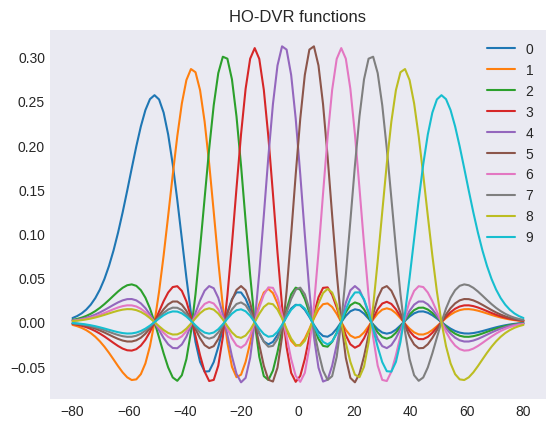

In [3]:
ho = HarmonicOscillator(ngrid=10, omega=1_000.0)
q = np.linspace(-80, 80, 100)
ho.plot_dvr(q=q)

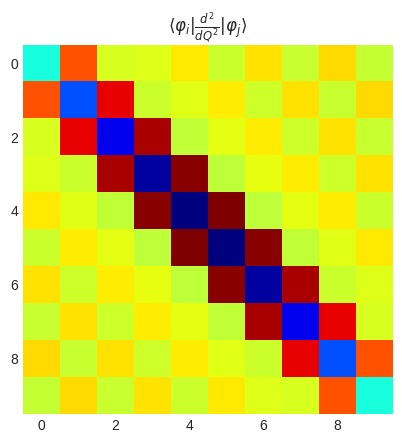

In [4]:
plt.title(r"$\langle\varphi_i|\frac{d^2}{dQ^2}|\varphi_j\rangle$")
plt.imshow(ho.get_2nd_derivative_matrix_dvr().real)
plt.show()

## 2. Sine DVR

- Sine DVR have equidistant grids

In [5]:
Sine?

Init signature:
Sine(
    ngrid: int,
    length: float,
    x0: float = 0.0,
    units: str = 'angstrom',
    doAnalytical: bool = True,
    include_terminal: bool = True,
)
Docstring:     
Sine DVR functions
Note that Sine DVR position matrix is not tridiagonal!
Index starts from j=1, alpha=1

Terminal points (x_{0} and x_{N+1}) do not belog to the grid.

See also  MCTDH review Phys.Rep. 324, 1 (2000) appendix B
https://doi.org/10.1016/S0370-1573(99)00047-2

Primitive Function :

.. math::
   \varphi_{j}(x)=
   \begin{cases}
   \sqrt{2 / L} \sin \left(j \pi\left(x-x_{0}\right) / L\right) \
   & \text { for } x_{0} \leq x \leq x_{N+1} \\ 0 & \text { else }
   \end{cases} \quad (j=1,2,\ldots,N)


Attributes:
    ngrid (int) : Number of grid.
        Note that which does not contain terminal point.
    nprim (int) : Number of primitive function. sama as ``ngrid``.
    length (float) : Length in a.u.
    x0 (float) : start point in a.u.
    doAnalytical (bool) : Use analytical integral o

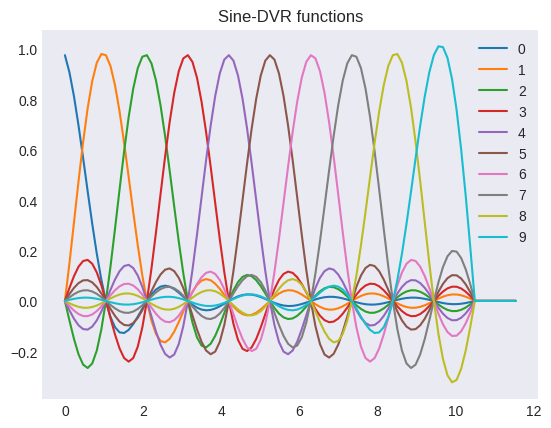

In [6]:
sin = Sine(ngrid=10, length=5.0)
sin.plot_dvr()

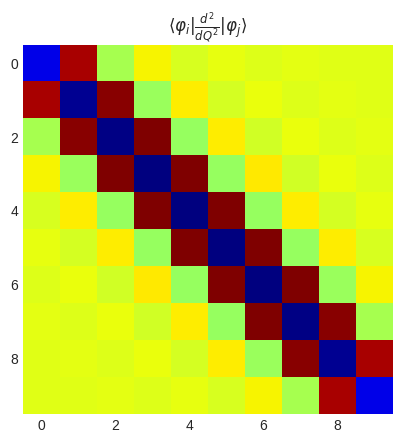

In [7]:
plt.title(r"$\langle\varphi_i|\frac{d^2}{dQ^2}|\varphi_j\rangle$")
plt.imshow(sin.get_2nd_derivative_matrix_dvr().real)
plt.show()

## 3. Exponential DVR

- Exponential DVR have equidistant grids with boundary condition.
- Same as FFT grid

In [8]:
Exponential?

Init signature:
Exponential(
    ngrid: int,
    length: float,
    x0: float = 0.0,
    doAnalytical: bool = True,
)
Docstring:     
Exponential DVR is equivalent to FFT. It is suitable for periodic system.

See also

- `MCTDH review Phys.Rep. 324, 1 (2000) appendix B.4.5 <https://doi.org/10.1016/S0370-1573(99)00047-2>`_
- `D.T. Colbert, W.H. Miller, J. Chem. Phys. 96 (1992) 1982. <https://doi.org/10.1063/1.462100>`_
- `R. Meyer, J. Chem. Phys. 52 (1969) 2053. <https://doi.org/10.1063/1.1673259>`_

Primitive Function :

.. math::
   \varphi_{j}(x)= \frac{1}{\sqrt{L}} \exp \left(\mathrm{i} \frac{2 \pi j (x-x_0)}{L}\right)
   \quad \left(-\frac{N-1}{2} \leq j \leq \frac{N-1}{2}\right)

They are periodic with period :math:`L=x_{N}-x_{0}`:

.. math::
   \varphi_{j}(x+L)=\varphi_{j}(x)

Note that :math:`N`, i.e., \
``ngrid`` must be odd number.

.. note::
   Naturally, the DVR function :math:`\chi_\alpha(x)` is given by the multiplication of \
   delta function at equidistant grid \
   :ma

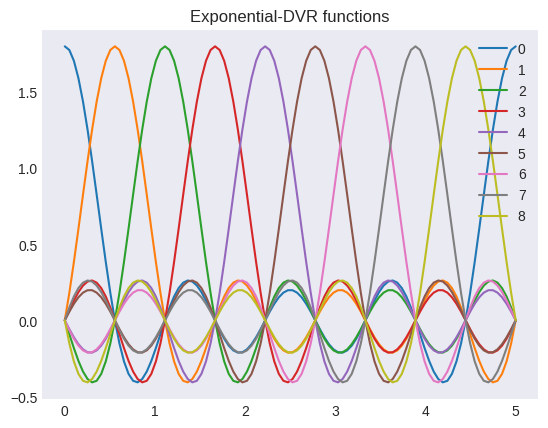

In [9]:
exp = Exponential(ngrid=9, length=5.0)
exp.plot_dvr()

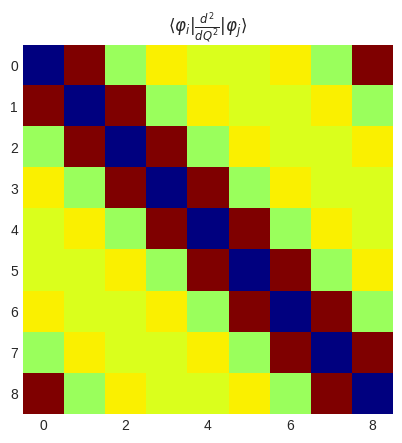

In [10]:
plt.title(r"$\langle\varphi_i|\frac{d^2}{dQ^2}|\varphi_j\rangle$")
plt.imshow(exp.get_2nd_derivative_matrix_dvr().real)
plt.show()